<div style="text-align: center; background-color: #fff; color: #444; padding: 25px; margin-bottom: 20px; border-radius: 20px; border: 5px dotted; border-image-slice: 1; border-image-source: linear-gradient(to right, #6a11cb, #2575fc, #43cea2); box-shadow: 0px 6px 12px rgba(0,0,0,0.3);">
    <h1 style="font-family: 'Verdana', sans-serif; font-size: 36px; font-weight: bold; letter-spacing: 2px; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        Spam Email Detection 📧
    </h1>
</div>


<div style="text-align: left; background-color: #fff; color: #444; padding: 20px; margin-bottom: 15px; border-radius: 15px; border: 4px dotted; border-image-slice: 1; border-image-source: linear-gradient(to right, #6a11cb, #2575fc, #43cea2); box-shadow: 0px 4px 8px rgba(0,0,0,0.2);">
    <h2 style="font-family: 'Verdana', sans-serif; font-size: 28px; font-weight: bold; text-shadow: 1px 1px 3px rgba(0,0,0,0.2);">
         Import necessary libraries ⚙️
    </h2>
</div>


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import re
import string

# Text processing and analysis
from textblob import TextBlob
from nltk.corpus import stopwords

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Machine learning
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

<div style="text-align: left; background-color: #f9f9f9; color: #333; padding: 18px; margin-bottom: 15px; border-radius: 15px; border: 3px dashed; border-image-slice: 1; border-image-source: linear-gradient(to right, #ff7e5f, #feb47b); box-shadow: 0px 4px 6px rgba(0,0,0,0.2);">
    <h2 style="font-family: 'Verdana', sans-serif; font-size: 28px; font-weight: bold; text-shadow: 1px 1px 3px rgba(0,0,0,0.1);">
        Load Dataset 📑
    </h2>
</div>


In [4]:
df = pd.read_csv('/kaggle/input/spam-email/spam.csv')  
df.sample(10)

,Category,Message
2487,ham,I dont thnk its a wrong calling between us
3945,ham,"Until 545 lor... Ya, can go 4 dinner together..."
2423,ham,A bloo bloo bloo I'll miss the first bowl
1862,ham,Aiyah then i wait lor. Then u entertain me. He...
2485,ham,Only if you promise your getting out as SOON a...
635,spam,"Dear Voucher Holder, 2 claim this weeks offer,..."
4609,ham,We live in the next &lt;#&gt; mins
1647,ham,Thts wat Wright Brother did to fly..
1656,ham,At 7 we will go ok na.
4141,ham,Leave it wif me lar... Ü wan to carry meh so h...


<div style="text-align: center; background-color: #fff; color: #444; padding: 25px; margin-bottom: 20px; border-radius: 20px; border: 5px dotted; border-image-slice: 1; border-image-source: linear-gradient(to right, #6a11cb, #2575fc, #43cea2); box-shadow: 0px 6px 12px rgba(0,0,0,0.3);">
    <h1 style="font-family: 'Verdana', sans-serif; font-size: 36px; font-weight: bold; letter-spacing: 2px; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        Exploratory Data Analysis 💣
    </h1>
</div>


In [5]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [8]:
df.duplicated().sum()

415

In [9]:
df = df.drop_duplicates()

<div style="text-align: left; background-color: #fff; color: #444; padding: 20px; margin-bottom: 15px; border-radius: 15px; border: 4px dotted; border-image-slice: 1; border-image-source: linear-gradient(to right, #6a11cb, #2575fc, #43cea2); box-shadow: 0px 4px 8px rgba(0,0,0,0.2);">
    <h2 style="font-family: 'Verdana', sans-serif; font-size: 26px; font-weight: bold; text-shadow: 1px 1px 3px rgba(0,0,0,0.2);">
        Class Distribution  🔨
    </h2>
</div>


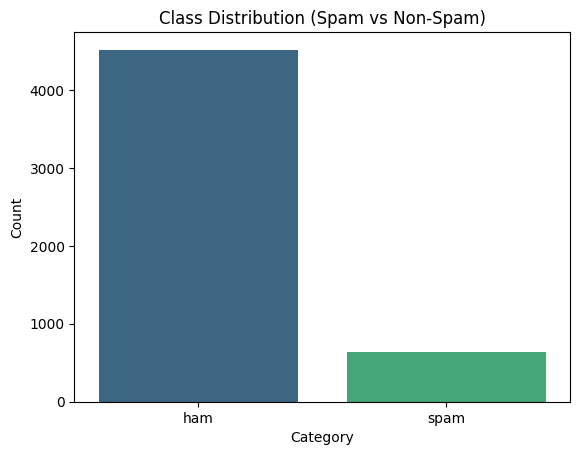

In [10]:
sns.countplot(x='Category', data=df, palette="viridis")
plt.title("Class Distribution (Spam vs Non-Spam)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

<div style="text-align: left; background-color: #fff; color: #444; padding: 20px; margin-bottom: 15px; border-radius: 15px; border: 4px dotted; border-image-slice: 1; border-image-source: linear-gradient(to right, #6a11cb, #2575fc, #43cea2); box-shadow: 0px 4px 8px rgba(0,0,0,0.2);">
    <h2 style="font-family: 'Verdana', sans-serif; font-size: 26px; font-weight: bold; text-shadow: 1px 1px 3px rgba(0,0,0,0.2);">
        Word Count Distribution ⛏️
    </h2>
</div>


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

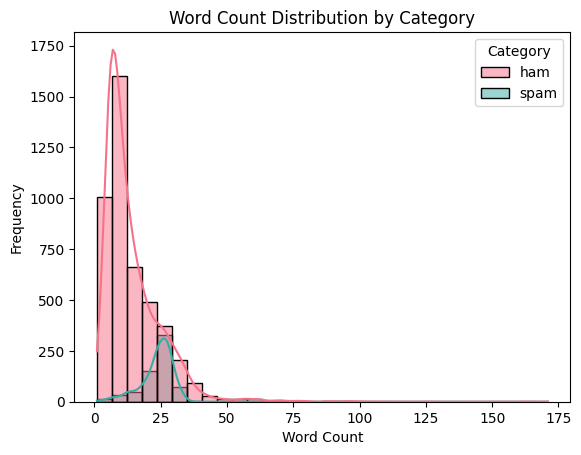

In [11]:
df['word_count'] = df['Message'].apply(lambda x: len(x.split()))
sns.histplot(data=df, x='word_count', hue='Category', bins=30, kde=True, palette="husl")
plt.title("Word Count Distribution by Category")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

<div style="text-align: left; background-color: #fff; color: #444; padding: 20px; margin-bottom: 15px; border-radius: 15px; border: 4px dotted; border-image-slice: 1; border-image-source: linear-gradient(to right, #6a11cb, #2575fc, #43cea2); box-shadow: 0px 4px 8px rgba(0,0,0,0.2);">
    <h2 style="font-family: 'Verdana', sans-serif; font-size: 26px; font-weight: bold; text-shadow: 1px 1px 3px rgba(0,0,0,0.2);">
        Character Count Distribution  📌
    </h2>
</div>


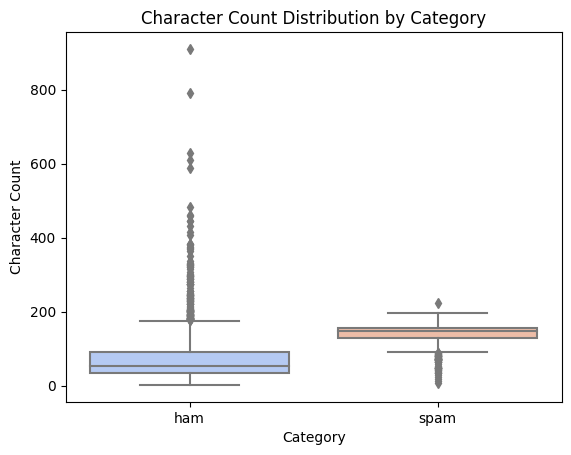

In [12]:
df['char_count'] = df['Message'].apply(len)
sns.boxplot(x='Category', y='char_count', data=df, palette="coolwarm")
plt.title("Character Count Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Character Count")
plt.show()

<div style="text-align: left; background-color: #fff; color: #444; padding: 20px; margin-bottom: 15px; border-radius: 15px; border: 4px dotted; border-image-slice: 1; border-image-source: linear-gradient(to right, #6a11cb, #2575fc, #43cea2); box-shadow: 0px 4px 8px rgba(0,0,0,0.2);">
    <h2 style="font-family: 'Verdana', sans-serif; font-size: 26px; font-weight: bold; text-shadow: 1px 1px 3px rgba(0,0,0,0.2);">
        Common Words in Spam Emails  📌
    </h2>
</div>


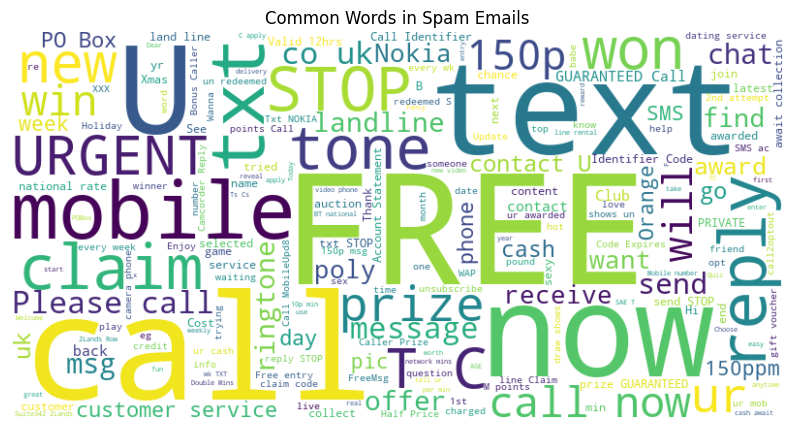

In [13]:
spam_text = df[df['Category'] == 'spam']['Message'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Spam Emails")
plt.show()

<div style="text-align: left; background-color: #fff; color: #444; padding: 20px; margin-bottom: 15px; border-radius: 15px; border: 4px dotted; border-image-slice: 1; border-image-source: linear-gradient(to right, #6a11cb, #2575fc, #43cea2); box-shadow: 0px 4px 8px rgba(0,0,0,0.2);">
    <h2 style="font-family: 'Verdana', sans-serif; font-size: 26px; font-weight: bold; text-shadow: 1px 1px 3px rgba(0,0,0,0.2);">
        Common Words in Non-Spam Emails 📍
    </h2>
</div>


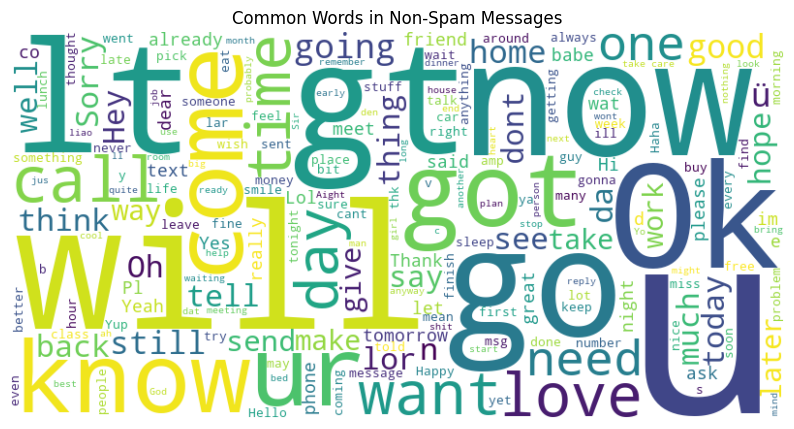

In [14]:
non_spam_text = " ".join(df[df['Category'] == 'ham']['Message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_spam_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Non-Spam Messages")
plt.show()


<div style="text-align: left; background-color: #fff; color: #444; padding: 20px; margin-bottom: 15px; border-radius: 15px; border: 4px dotted; border-image-slice: 1; border-image-source: linear-gradient(to right, #6a11cb, #2575fc, #43cea2); box-shadow: 0px 4px 8px rgba(0,0,0,0.2);">
    <h2 style="font-family: 'Verdana', sans-serif; font-size: 26px; font-weight: bold; text-shadow: 1px 1px 3px rgba(0,0,0,0.2);">
        Punctuation Usage 📍
    </h2>
</div>


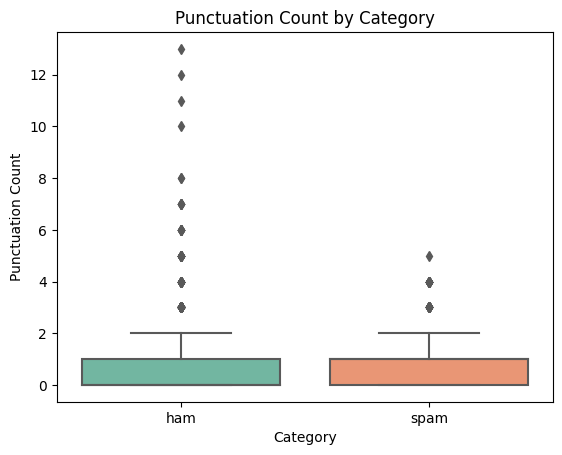

In [15]:
df['punctuation_count'] = df['Message'].apply(lambda x: sum([1 for char in x if char in '!?']))
sns.boxplot(x='Category', y='punctuation_count', data=df, palette="Set2")
plt.title("Punctuation Count by Category")
plt.xlabel("Category")
plt.ylabel("Punctuation Count")
plt.show()


<div style="text-align: left; background-color: #fff; color: #444; padding: 20px; margin-bottom: 15px; border-radius: 15px; border: 4px dotted; border-image-slice: 1; border-image-source: linear-gradient(to right, #6a11cb, #2575fc, #43cea2); box-shadow: 0px 4px 8px rgba(0,0,0,0.2);">
    <h2 style="font-family: 'Verdana', sans-serif; font-size: 26px; font-weight: bold; text-shadow: 1px 1px 3px rgba(0,0,0,0.2);">
       Message Sentiment Analysis 📍
    </h2>
</div>


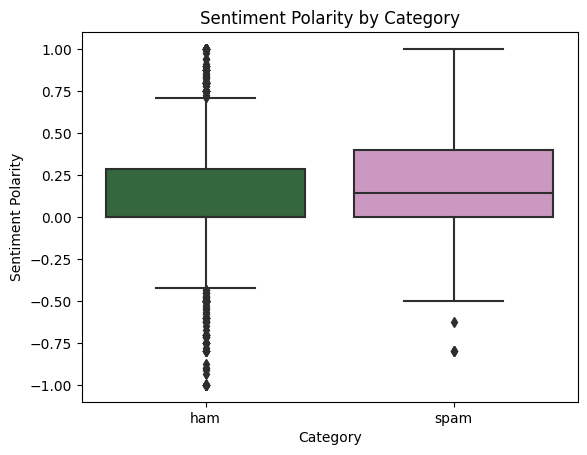

In [16]:
from textblob import TextBlob

df['sentiment_polarity'] = df['Message'].apply(lambda x: TextBlob(x).sentiment.polarity)
sns.boxplot(x='Category', y='sentiment_polarity', data=df, palette="cubehelix")
plt.title("Sentiment Polarity by Category")
plt.xlabel("Category")
plt.ylabel("Sentiment Polarity")
plt.show()


<div style="text-align: left; background-color: #fff; color: #444; padding: 20px; margin-bottom: 15px; border-radius: 15px; border: 4px dotted; border-image-slice: 1; border-image-source: linear-gradient(to right, #6a11cb, #2575fc, #43cea2); box-shadow: 0px 4px 8px rgba(0,0,0,0.2);">
    <h2 style="font-family: 'Verdana', sans-serif; font-size: 26px; font-weight: bold; text-shadow: 1px 1px 3px rgba(0,0,0,0.2);">
        Most Common N-Grams 📍
    </h2>
</div>


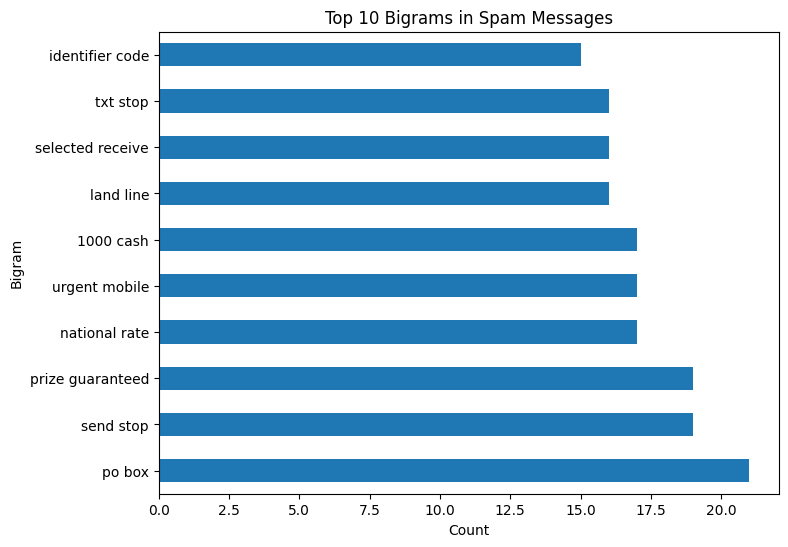

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Extract bigrams from spam messages
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
spam_bigrams = vectorizer.fit_transform(df[df['Category'] == 'spam']['Message'])
bigram_counts = pd.DataFrame(spam_bigrams.sum(axis=0).T, index=vectorizer.get_feature_names_out(), columns=['count'])
top_bigrams = bigram_counts.sort_values(by='count', ascending=False).head(10)

# Plot top bigrams
top_bigrams.plot(kind='barh', figsize=(8, 6), legend=False)
plt.title("Top 10 Bigrams in Spam Messages")
plt.xlabel("Count")
plt.ylabel("Bigram")
plt.show()


<div style="text-align: center; background-color: #fff; color: #444; padding: 25px; margin-bottom: 20px; border-radius: 20px; border: 5px dotted; border-image-slice: 1; border-image-source: linear-gradient(to right, #6a11cb, #2575fc, #43cea2); box-shadow: 0px 6px 12px rgba(0,0,0,0.3);">
    <h1 style="font-family: 'Verdana', sans-serif; font-size: 36px; font-weight: bold; letter-spacing: 2px; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        Text Preprocessing  💬
    </h1>
</div>


In [18]:
 # remove tags 
def remove_tag(text):
    pattren = re.compile('<[^>]+>')
    return pattren.sub(r'', text)
# remove URLs 
def remove_urls(text):
    pattren = re.compile(r'\b(?:https?|ftp|www)\S+\b')
    return pattren.sub(r'', text)

import re
def remove_emojis(text):
    # Define a regex pattern to match emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & map symbols
        u"\U0001F700-\U0001F77F"  # Alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"  # Enclosed characters
        "]+", flags=re.UNICODE
    )
    # Substitute emojis with an empty string
    return emoji_pattern.sub(r'', text)
# Define a dictionary of chat word mappings
chat_words = {
"AFAIK": "As Far As I Know",
"AFK": "Away From Keyboard",
"ASAP": "As Soon As Possible",
"ATK": "At The Keyboard",
"ATM": "At The Moment",
"A3": "Anytime, Anywhere, Anyplace",
"BAK": "Back At Keyboard",
"BBL": "Be Back Later",
"BBS": "Be Back Soon",
"BFN": "Bye For Now",
"B4N": "Bye For Now",
"BRB": "Be Right Back",
"BRT": "Be Right There",
"BTW": "By The Way",
"B4": "Before",
"B4N": "Bye For Now",
"CU": "See You",
"CUL8R": "See You Later",
"CYA": "See You",
"FAQ": "Frequently Asked Questions",
"FC": "Fingers Crossed",
"FWIW": "For What It's Worth",
"FYI": "For Your Information",
"GAL": "Get A Life",
"GG": "Good Game",
"GN": "Good Night",
"GMTA": "Great Minds Think Alike",
"GR8": "Great!",
"G9": "Genius",
"IC": "I See",
"ICQ": "I Seek you (also a chat program)",
"ILU": "ILU: I Love You",
"IMHO": "In My Honest/Humble Opinion",
"IMO": "In My Opinion",
"IOW": "In Other Words",
"IRL": "In Real Life",
"KISS": "Keep It Simple, Stupid",
"LDR": "Long Distance Relationship",
"LMAO": "Laugh My A.. Off",
"LOL": "Laughing Out Loud",
"LTNS": "Long Time No See",
"L8R": "Later",
"MTE": "My Thoughts Exactly",
"M8": "Mate",
"NRN": "No Reply Necessary",
"OIC": "Oh I See",
"PITA": "Pain In The A..",
"PRT": "Party",
"PRW": "Parents Are Watching",
"QPSA?": "Que Pasa?",
"ROFL": "Rolling On The Floor Laughing",
"ROFLOL": "Rolling On The Floor Laughing Out Loud",
"ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
"SK8": "Skate",
"STATS": "Your sex and age",
"ASL": "Age, Sex, Location",
"THX": "Thank You",
"TTFN": "Ta-Ta For Now!",
"TTYL": "Talk To You Later",
"U": "You",
"U2": "You Too",
"U4E": "Yours For Ever",
"WB": "Welcome Back",
"WTF": "What The F...",
"WTG": "Way To Go!",
"WUF": "Where Are You From?",
"W8": "Wait...",
"7K": "Sick:-D Laugher",
"TFW": "That feeling when",
"MFW": "My face when",
"MRW": "My reaction when",
"IFYP": "I feel your pain",
"TNTL": "Trying not to laugh",
"JK": "Just kidding",
"IDC": "I don't care",
"ILY": "I love you",
"IMU": "I miss you",
"ADIH": "Another day in hell",
"ZZZ": "Sleeping, bored, tired",
"WYWH": "Wish you were here",
"TIME": "Tears in my eyes",
"BAE": "Before anyone else",
"FIMH": "Forever in my heart",
"BSAAW": "Big smile and a wink",
"BWL": "Bursting with laughter",
"BFF": "Best friends forever",
"CSL": "Can't stop laughing"
}
def chat_conversion(text):
    new_text = []
    for word in text.split():
        if word.upper() in chat_words:
            new_text.append(chat_words[word.upper()])
        else:
            new_text.append(word)
    return " ".join(new_text)


# from textblob import TextBlob


# # Correct the spelling in each review
# df['review_corrected'] = df['review'].apply(lambda x: str(TextBlob(x).correct()))

# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    new_text = [word for word in text.split() if word not in stop_words]
    return ' '.join(new_text)

# remove punctuation from discription column;
puncuations = string.punctuation
exclude = puncuations
def remove_punc(text):
    for char in exclude:
        text = text.replace(char, '')
        return text

In [19]:
df['Message'] = df['Message'].str.lower()
df['Message'] = df['Message'].apply(remove_tag)
df['Message'] = df['Message'].apply(remove_urls)
df['Message'] = df['Message'].apply(remove_emojis)
df['Message'] = df['Message'].apply(chat_conversion)
df['Message'] = df['Message'].apply(remove_stopwords)
df['Message'] = df['Message'].apply(remove_punc)

<div style="text-align: center; background-color: #fff; color: #444; padding: 25px; margin-bottom: 20px; border-radius: 20px; border: 5px dotted; border-image-slice: 1; border-image-source: linear-gradient(to right, #6a11cb, #2575fc, #43cea2); box-shadow: 0px 6px 12px rgba(0,0,0,0.3);">
    <h1 style="font-family: 'Verdana', sans-serif; font-size: 36px; font-weight: bold; letter-spacing: 2px; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        ML Models 🛠️
    </h1>
</div>


In [ ]:
# Splitting data
X = df['Message']
y = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<div style="text-align: left; background-color: #fff; color: #444; padding: 20px; margin-bottom: 15px; border-radius: 15px; border: 4px dotted; border-image-slice: 1; border-image-source: linear-gradient(to right, #6a11cb, #2575fc, #43cea2); box-shadow: 0px 4px 8px rgba(0,0,0,0.2);">
    <h2 style="font-family: 'Verdana', sans-serif; font-size: 26px; font-weight: bold; text-shadow: 1px 1px 3px rgba(0,0,0,0.2);">
        Logistic Regression ⚙️
    </h2>
</div>


In [21]:
# Create pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(2, 2))),  # Apply bigram (2-gram)
    ('classifier', LogisticRegression())  # Logistic Regression Model
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(2, 2))),
                ('classifier', LogisticRegression())])

In [22]:
# Predict and evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logidtic Regression Accuracy: {accuracy:.2f}")

Logidtic Regression Accuracy: 0.94


<div style="text-align: left; background-color: #fff; color: #444; padding: 20px; margin-bottom: 15px; border-radius: 15px; border: 4px dotted; border-image-slice: 1; border-image-source: linear-gradient(to right, #6a11cb, #2575fc, #43cea2); box-shadow: 0px 4px 8px rgba(0,0,0,0.2);">
    <h2 style="font-family: 'Verdana', sans-serif; font-size: 26px; font-weight: bold; text-shadow: 1px 1px 3px rgba(0,0,0,0.2);">
        Naive Bayes  ⚙️
    </h2>
</div>


In [23]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(2, 2))),  # Apply bigram (2-gram)
    ('Naive Bayes', MultinomialNB())
])

# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(2, 2))),
                ('Naive Bayes', MultinomialNB())])

In [24]:
# Predict and evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.2f}")

Naive Bayes Accuracy: 0.98


<div style="text-align: left; background-color: #fff; color: #444; padding: 20px; margin-bottom: 15px; border-radius: 15px; border: 4px dotted; border-image-slice: 1; border-image-source: linear-gradient(to right, #6a11cb, #2575fc, #43cea2); box-shadow: 0px 4px 8px rgba(0,0,0,0.2);">
    <h2 style="font-family: 'Verdana', sans-serif; font-size: 26px; font-weight: bold; text-shadow: 1px 1px 3px rgba(0,0,0,0.2);">
        Random Forest  ⚙️
    </h2>
</div>


In [ ]:

pipeline_rf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(2, 2))),  # Apply bigram (2-gram)
    ('Random Forest', RandomForestClassifier(n_estimators=100))
])

pipeline_rf.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(2, 2))),
                ('Random Forest', RandomForestClassifier())])

In [26]:
y_pred_rf = pipeline_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")


Random Forest Accuracy: 0.95
